# Swyft in 15 Minutes

We discuss seven key steps of a typical Swyft workflow.

## 1. Installing Swyft

We can use `pip` to install the lightning branch (latest development branch) of Swyft.

In [2]:
#!pip install https://github.com/undark-lab/swyft.git

In [3]:
import numpy as np
from scipy import stats
import pylab as plt
import torch
import swyft
DEVICE = 'gpu' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(0)
np.random.seed(0)

## 2. Define the Simulator

Next we define a simulator class, which specifies the computational graph of our simulator.

In [4]:
class Simulator(swyft.Simulator):
    def __init__(self):
        super().__init__()
        self.transform_samples = swyft.to_numpy32
        self.x = np.linspace(-1, 1, 10)
         
    def build(self, graph):
        z = graph.node('z', lambda: np.random.rand(2)*2-1)
        f = graph.node('f', lambda z: z[0] + z[1]*self.x, z)
        x = graph.node('x', lambda f: f + np.random.randn(10)*0.1, f)
        
sim = Simulator()
samples = sim.sample(N = 10000)

  0%|          | 0/10000 [00:00<?, ?it/s]

## 3. Define the SwyftModule

In [5]:
class Network(swyft.SwyftModule):
    def __init__(self):
        super().__init__()
        self.embedding = torch.nn.Linear(10, 2)
        self.logratios1 = swyft.LogRatioEstimator_1dim(num_features = 2, num_params = 2, varnames = 'z')
        self.logratios2 = swyft.LogRatioEstimator_Ndim(num_features = 2, marginals = ((0, 1),), varnames = 'z')

    def forward(self, A, B):
        embedding = self.embedding(A['x'])
        logratios1 = self.logratios1(embedding, B['z'])
        logratios2 = self.logratios2(embedding, B['z'])
        return logratios1, logratios2

## 4. Train the model

In [6]:
trainer = swyft.SwyftTrainer(accelerator = DEVICE)

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/cweniger/opt/anaconda3/envs/native2/lib/python3.9/site-packages/pytorch_lightning/trainer/setup.py:200: UserWarning: MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.
  rank_zero_warn(


In [7]:
dm = swyft.SwyftDataModule(samples, batch_size = 64)

In [8]:
network = Network()
trainer.fit(network, dm)

/Users/cweniger/opt/anaconda3/envs/native2/lib/python3.9/site-packages/pytorch_lightning/loops/utilities.py:94: PossibleUserWarning: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
  rank_zero_warn(
The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: ModelCheckpoint

  | Name       | Type                   | Params
------------------------------------------------------
0 | embedding  | Linear                 | 22    
1 | logratios1 | LogRatioEstimator_1dim | 34.9 K
2 | logratios2 | LogRatioEstimator_Ndim | 17.5 K
------------------------------------------------------
52.5 K    Trainable params
0         Non-trainable params
52.5 K    Total params
0.210     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/Users/cweniger/opt/anaconda3/envs/native2/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/Users/cweniger/opt/anaconda3/envs/native2/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Reloading best model: /Users/cweniger/Documents/swyft/notebooks/lightning_logs/version_58/checkpoints/epoch=38-step=4875.ckpt


## 5. Visualize training

N/A

## 6. Perform validation tests

In [10]:
test_samples = sim.sample(N = 1000)
trainer.test(network, test_samples.get_dataloader(batch_size = 64))

  0%|          | 0/1000 [00:00<?, ?it/s]

The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: EarlyStopping, ModelCheckpoint
/Users/cweniger/opt/anaconda3/envs/native2/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, test_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_loss           -3.4464657306671143
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': -3.4464657306671143}]

In [11]:
B = samples[:1000]
A = samples[:1000]
mass = trainer.test_coverage(network, A, B)

The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: EarlyStopping, ModelCheckpoint


Predicting: 125it [00:00, ?it/s]

/Users/cweniger/opt/anaconda3/envs/native2/lib/python3.9/site-packages/pytorch_lightning/loops/epoch/prediction_epoch_loop.py:173: UserWarning: Lightning couldn't infer the indices fetched for your dataloader.
  warning_cache.warn("Lightning couldn't infer the indices fetched for your dataloader.")
The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: EarlyStopping, ModelCheckpoint


Predicting: 125it [00:00, ?it/s]

## 7. Generate posteriors

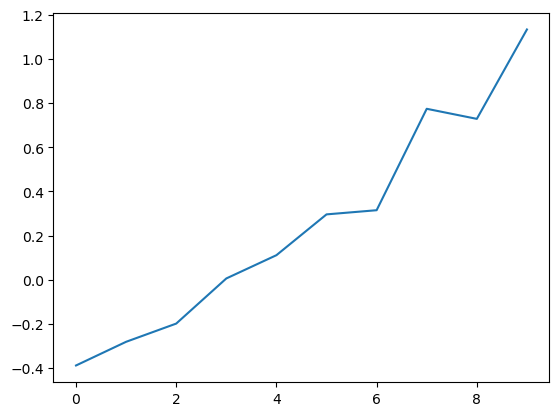

In [12]:
z0 = np.array([0.3, 0.7])
x0 = sim.sample(conditions = {"z": z0})['x']
plt.plot(x0)

In [13]:
prior_samples = sim.sample(targets = ['z'], N = 100000)

  0%|          | 0/100000 [00:00<?, ?it/s]

In [14]:
predictions = trainer.infer(network, swyft.Sample(x = x0), prior_samples)

The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: EarlyStopping, ModelCheckpoint


Predicting: 125it [00:00, ?it/s]

In [ ]:
predictions[0].parnames

array([['z[0]'],
       ['z[1]']], dtype='<U4')

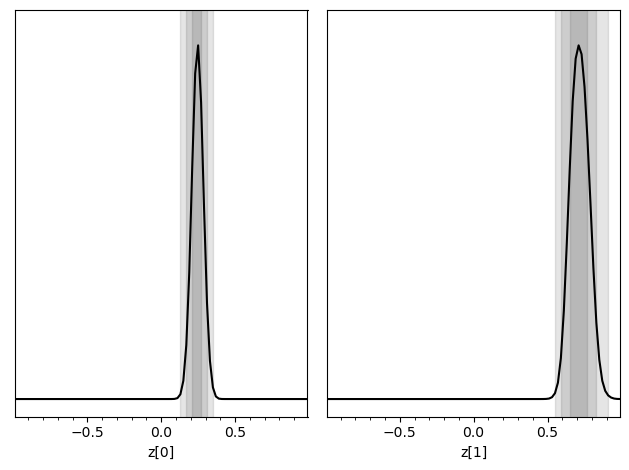

In [19]:
swyft.plot_posterior(predictions, ['z[0]', 'z[1]']);